In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV



Part -1

Part 1. 1 a - Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

Part 1.1 b - Print Shape and columns of all the 3 DataFrames

Part 1.1 c - Compare Column names of all the 3 DataFrames and clearly write observations

Part 1.1 d - Print DataTypes of all the 3 DataFrames.

Part 1.1 e - Observe and share variation in ‘Class’ feature of all the 3 DaraFrames

Part 1.2 a - Unify all the variations in ‘Class’ feature for all the 3 DataFrames

Part 1.2 b - Combine all the 3 DataFrames to form a single DataFrame

Part 1.2 c - Print 5 random samples of this DataFrame

Part 1.2 d - Print Feature-wise percentage of Null values

Part 1.2 e - Check 5-point summary of the new DataFrame

Part 1.3 a - Visualize a heatmap to understand correlation between all features

Part 1.3 b - Share insights on correlation

Part 1.3 c - Visualize a pairplot with 3 classes distinguished by colors and share insights

Part 1.3 d - Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights

Part 1.3 e - Visualize a boxplot to check distribution of the features and share insights.

Part 1.4 a - Split data into X and Y.

Part 1.4 b - Split data into train and test with 80:20 proportion

Part 1.4 c - Train a Supervised Learning Classification base model using KNN classifier

Part 1.4 d - Print all the possible performance metrics for both train and test data

Part 1.5 a - Experiment with various parameters to improve performance of the base model

Part 1.5 b - Clearly showcase improvement in performance achieved

Part 1.5 c - Clearly state which parameters contributed most to improve model performance.

In [4]:
normal_csv=pd.read_csv("/content/Normal.csv")
typeh_csv=pd.read_csv("/content/Type_H.csv")
types_csv=pd.read_csv("/content/Type_S.csv")

In [5]:
print("Shape of Normal:", normal_csv.shape)
print("Columns of Normal:",normal_csv.columns)


Shape of Normal: (100, 7)
Columns of Normal: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [6]:
print("Shape of typeh:", typeh_csv.shape)
print("Columns of typeh:",typeh_csv.columns)

Shape of typeh: (60, 7)
Columns of typeh: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [7]:
print("Shape of types:", types_csv.shape)
print("Columns of types:",types_csv.columns)

Shape of types: (150, 7)
Columns of types: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [8]:
# Get the column names of each DataFrame
columns_normal_csv = set(normal_csv.columns)
columns_typeh_csv = set(typeh_csv.columns)
columns_types_csv = set(types_csv.columns)

# Find the common column names
common_columns = columns_normal_csv.intersection(columns_typeh_csv, columns_types_csv)

# Print the common column names
print("Common columns:", common_columns)

# If you want to find columns that are unique to each DataFrame, you can use set differences
unique_columns_normal_csv = columns_normal_csv - (columns_typeh_csv | columns_types_csv)
unique_columns_typeh_csv = columns_typeh_csv - (columns_normal_csv | columns_types_csv)
unique_columns_types_csv = columns_types_csv - (columns_normal_csv | columns_typeh_csv)

# Print unique columns for each DataFrame
print("Unique columns in normal_csv:", unique_columns_normal_csv)
print("Unique columns in typeh_csv:", unique_columns_typeh_csv)
print("Unique columns in types_csv:", unique_columns_types_csv)


Common columns: {'P_tilt', 'S_slope', 'L_angle', 'S_Degree', 'Class', 'P_incidence', 'P_radius'}
Unique columns in normal_csv: set()
Unique columns in typeh_csv: set()
Unique columns in types_csv: set()


Common columns: These are the column names that exist in all three DataFrames. In this case, the common columns are {'L_angle', 'P_tilt', 'S_Degree', 'S_slope', 'P_incidence', 'Class', 'P_radius'}.

Unique columns: There are no unique columns in any of the DataFrames. This means that all the columns in each DataFrame are shared with at least one of the other two DataFrames.

As we see the common columns include all the columns in three data frames there is no need to compare them in pairs

In summary, the three DataFrames have identical column names, and there are no columns that are exclusive to any of the DataFrames.

In [9]:

print("Data types of normal_csv:")
print(normal_csv.dtypes)

print("\nData types of typeh_csv:")
print(typeh_csv.dtypes)

print("\nData types of types_csv:")
print(types_csv.dtypes)

Data types of normal_csv:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Data types of typeh_csv:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Data types of types_csv:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [10]:

print("Variation in 'Class' feature for normal_csv:")
class_variation_normal_csv = normal_csv['Class'].value_counts()
print(class_variation_normal_csv)

print("\nVariation in 'Class' feature for typeh_csv:")
class_variation_typeh_csv = typeh_csv['Class'].value_counts()
print(class_variation_typeh_csv)

print("\nVariation in 'Class' feature for types_csv:")
class_variation_types_csv = types_csv['Class'].value_counts()
print(class_variation_types_csv)

Variation in 'Class' feature for normal_csv:
Normal    73
Nrmal     27
Name: Class, dtype: int64

Variation in 'Class' feature for typeh_csv:
Type_H    37
type_h    23
Name: Class, dtype: int64

Variation in 'Class' feature for types_csv:
Type_S    133
tp_s       17
Name: Class, dtype: int64


In [11]:
combined_df = pd.concat([normal_csv, typeh_csv, types_csv])

print("Unified Variation in 'Class' feature:")
class_variation_combined = combined_df['Class'].value_counts()
print(class_variation_combined)

Unified Variation in 'Class' feature:
Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64


combined_df is the comp=bined dataframe with the 3 dataframes

In [12]:
print(combined_df.shape)

(310, 7)


In [13]:
random_samples = combined_df.sample(n=5)

print(random_samples)

    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
87    55.080766  -3.759930  56.000000  58.840695  109.915367  31.773583   
12    56.103774  13.106307  62.637020  42.997467  116.228503  31.172767   
49    63.619192  16.934508  49.349262  46.684684  117.089747  -0.357812   
40    36.157830  -0.810514  33.627314  36.968344  135.936910  -2.092507   
88    66.507179  20.897672  31.727471  45.609507  128.902905   1.517203   

     Class  
87  Type_S  
12   Nrmal  
49  Normal  
40  Normal  
88  Normal  


In [14]:
null_percentage = (combined_df.isnull().mean() * 100).round(2)
print("Feature-wise percentage of Null values:")
print(null_percentage)

Feature-wise percentage of Null values:
P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


In [15]:

summary = combined_df.describe()

print("5-Point Summary:")
print(summary)

5-Point Summary:
       P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082


<ipython-input-16-4725884d1e91>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_df.corr()


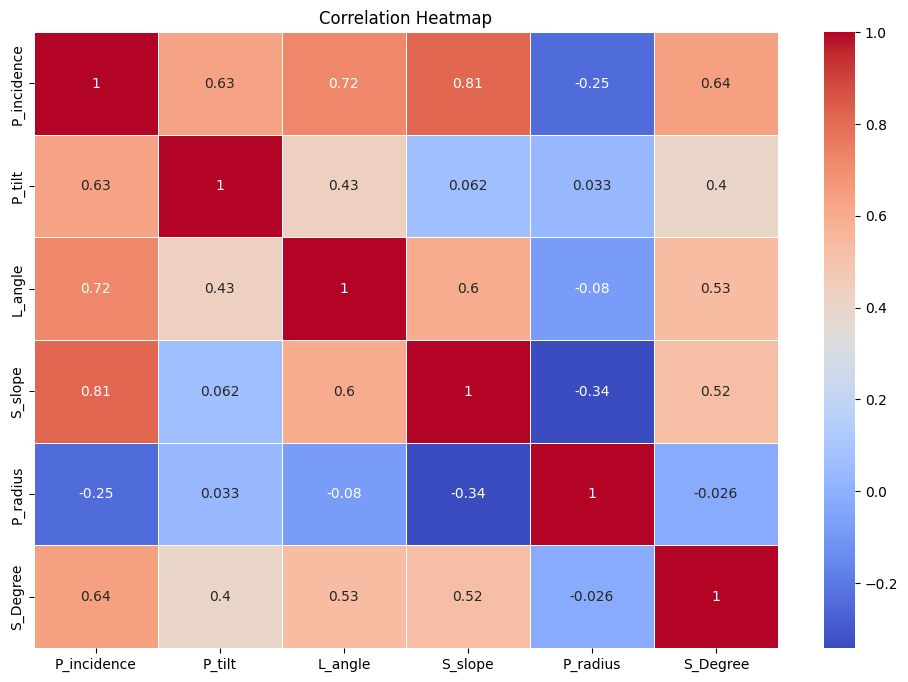

In [16]:

correlation_matrix = combined_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

P-Incidence and S_slope show the highest positive correlation. followed by L_Angle and P_Incidence and P_tilt and P_Incidence.

From the above observation it is safe to say that P_Incidence has highest correlation with most columns except P_Radius.

S_slope and P_radius have the maximum negative correlation but is significantly less than most absolute correlations.

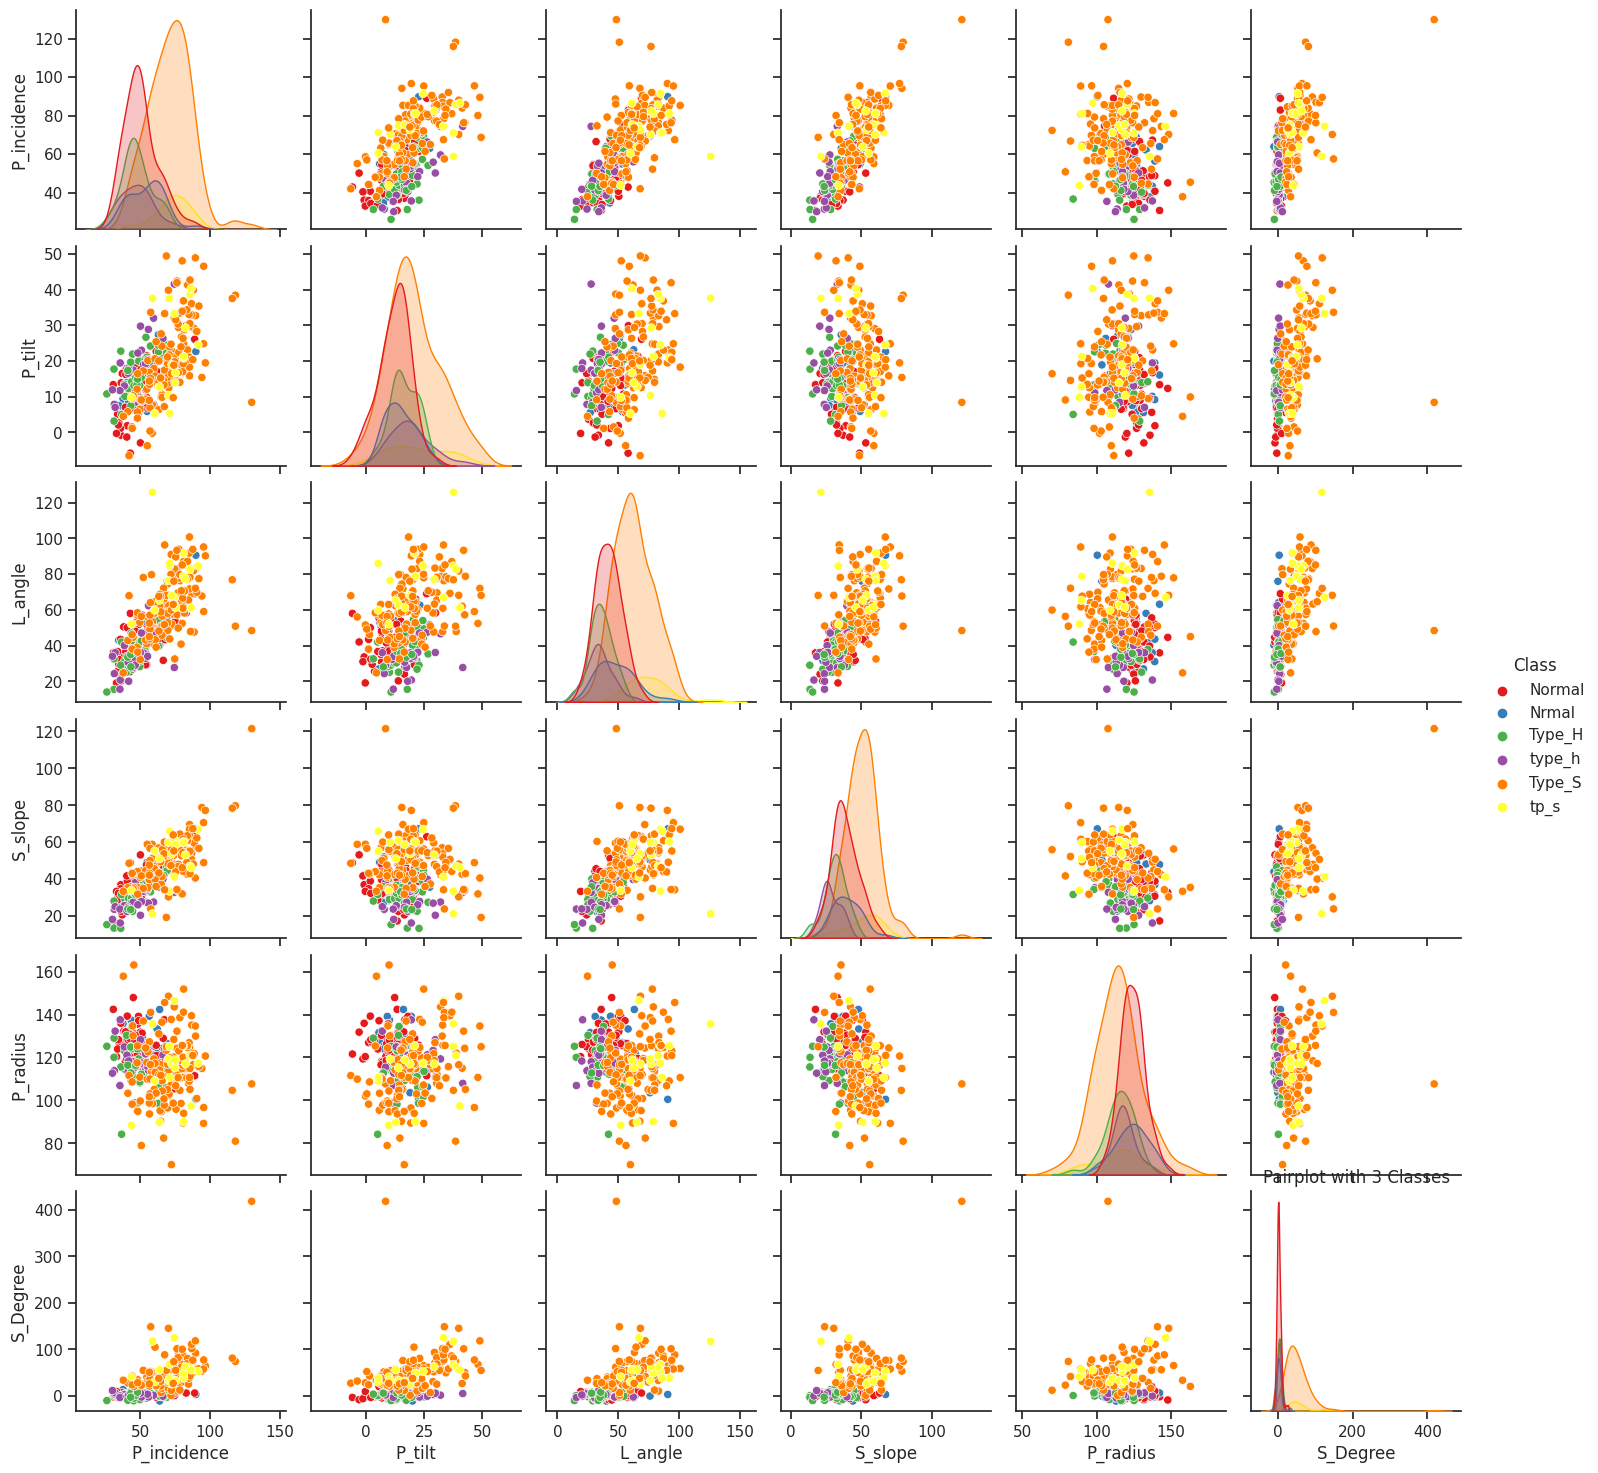

In [17]:

sns.set(style="ticks")
sns.pairplot(data=combined_df, hue="Class", palette="Set1")
plt.title("Pairplot with 3 Classes")

plt.show()

The pairplot shows that there is a strong correlation between several of the variables. For example, there is a strong positive correlation between P_incidence and P_tilt.

There is also a strong negative correlation between P_incidence and L_angle.

The pairplot also shows that there is a moderate correlation between P_incidence and S_degree, but the correlation is not as strong as the correlation between P_incidence and P_tilt or L_angle.

Finally, the pairplot shows that there is a weak correlation between P_incidence and P_radius.

Conclusion

The pairplot shows that there is a strong correlation between several variables . This suggests that these variables may be useful for predicting. However, it is important to note that correlation does not equal causation.

The pairplot also shows that the data is not perfectly normally distributed. There are some outliers, and the distributions of some of the variables are skewed. This may be important to consider when choosing a statistical model to analyze the data.


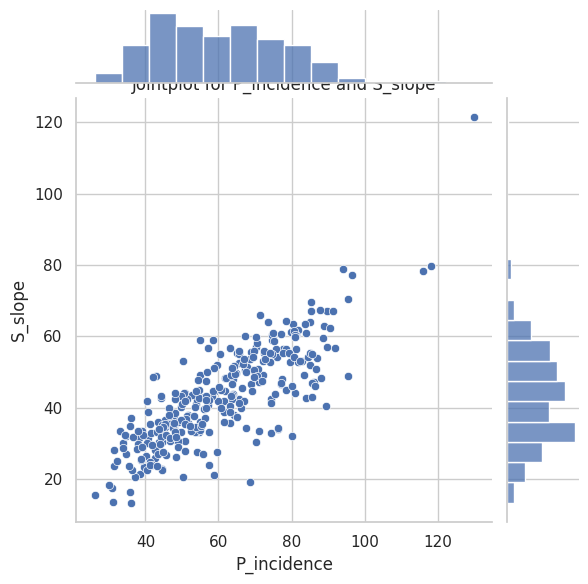

In [18]:

sns.set(style="whitegrid")
sns.jointplot(data=combined_df, x="P_incidence", y="S_slope", kind="scatter")
plt.title("Jointplot for P_incidence and S_slope")

plt.show()

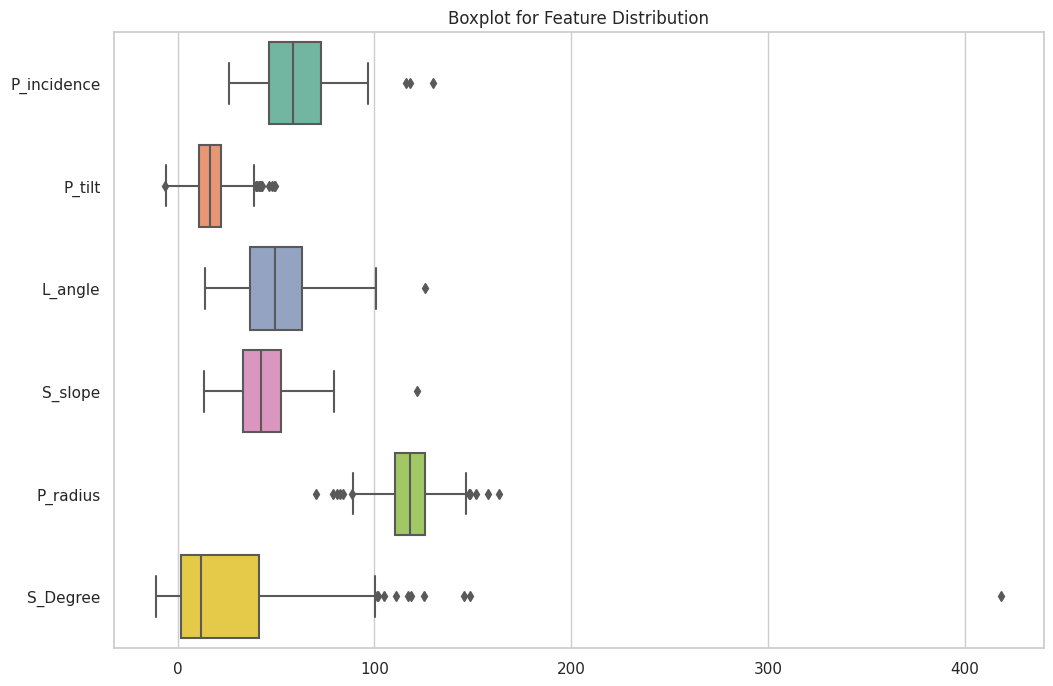

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_df, orient="h", palette="Set2")
plt.title("Boxplot for Feature Distribution")
plt.show()

The box plot shows that the P_incidence data set has the highest median number of features, followed by the P_tilt, L_angle, and S_degree data sets. The P_radius data set has the lowest median number of features.

The box plot also shows that the P_incidence and P_tilt data sets have the widest ranges of feature values, followed by the L_angle and S_degree data sets. The P_radius data set has the smallest range of feature values.

The box plot shows that the P_incidence and P_tilt data sets have the highest number of features and the widest ranges of feature values. This suggests that these data sets may be more informative for predicting.


In [20]:
X = combined_df.drop(columns=['Class'])

Y = combined_df['Class']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [22]:
k = 4
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, Y_train)

Y_pred = knn_classifier.predict(X_test)


In [23]:

Y_train_pred = knn_classifier.predict(X_train)
accuracy_train = accuracy_score(Y_train, Y_train_pred)
precision_train = precision_score(Y_train, Y_train_pred, average='weighted')
recall_train = recall_score(Y_train, Y_train_pred, average='weighted')
f1_score_train = f1_score(Y_train, Y_train_pred, average='weighted')
confusion_matrix_train = confusion_matrix(Y_train, Y_train_pred)

accuracy_test = accuracy_score(Y_test, Y_pred)
precision_test = precision_score(Y_test, Y_pred, average='weighted')
recall_test = recall_score(Y_test, Y_pred, average='weighted')
f1_score_test = f1_score(Y_test, Y_pred, average='weighted')
confusion_matrix_test = confusion_matrix(Y_test, Y_pred)

print("Metrics for the training data:")
print(f"Accuracy (Train): {accuracy_train:.2f}")
print(f"Precision (Train): {precision_train:.2f}")
print(f"Recall (Train): {recall_train:.2f}")
print(f"F1 Score (Train): {f1_score_train:.2f}")
print("Confusion Matrix (Train):")
print(confusion_matrix_train)

print("\nMetrics for the testing data:")
print(f"Accuracy (Test): {accuracy_test:.2f}")
print(f"Precision (Test): {precision_test:.2f}")
print(f"Recall (Test): {recall_test:.2f}")
print(f"F1 Score (Test): {f1_score_test:.2f}")
print("Confusion Matrix (Test):")
print(confusion_matrix_test)

print("\nClassification Report (Train):")
print(classification_report(Y_train, Y_train_pred))
print("\nClassification Report (Test):")
print(classification_report(Y_test, Y_pred))


Metrics for the training data:
Accuracy (Train): 0.77
Precision (Train): 0.77
Recall (Train): 0.77
F1 Score (Train): 0.75
Confusion Matrix (Train):
[[ 49   3   1   1   0   2]
 [  9  10   2   1   0   0]
 [ 12   0  13   0   0   4]
 [  1   2   1 105   0   0]
 [  0   0   0   8   3   0]
 [  7   1   3   0   0  10]]

Metrics for the testing data:
Accuracy (Test): 0.60
Precision (Test): 0.50
Recall (Test): 0.60
F1 Score (Test): 0.54
Confusion Matrix (Test):
[[16  0  0  1  0  0]
 [ 3  0  2  0  0  0]
 [ 3  1  2  0  0  2]
 [ 3  0  0 19  2  0]
 [ 0  0  0  6  0  0]
 [ 1  0  1  0  0  0]]

Classification Report (Train):
              precision    recall  f1-score   support

      Normal       0.63      0.88      0.73        56
       Nrmal       0.62      0.45      0.53        22
      Type_H       0.65      0.45      0.53        29
      Type_S       0.91      0.96      0.94       109
        tp_s       1.00      0.27      0.43        11
      type_h       0.62      0.48      0.54        21

    acc

To Find the best parameters for this model


STEP-1: Find the most favourable K value

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

knn_classifier = KNeighborsClassifier()

grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

best_k = grid_search.best_params_['n_neighbors']

best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, Y_train)

Y_pred = best_knn_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Best k value: {best_k}")
print(f"Accuracy with best k: {accuracy:.2f}")


Best k value: 5
Accuracy with best k: 0.58


### Best K Value for our data set is *5*

STEP-2: Trying different distance metrics

In [25]:

knn_classifier_manhattan = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn_classifier_manhattan.fit(X_train, Y_train)

Y_pred_manhattan = knn_classifier_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(Y_test, Y_pred_manhattan)
print(f"Accuracy with Manhattan distance: {accuracy_manhattan:.2f}")



knn_classifier_euclidean = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_classifier_euclidean.fit(X_train, Y_train)

Y_pred_euclidean = knn_classifier_manhattan.predict(X_test)
accuracy_euclidean = accuracy_score(Y_test, Y_pred_euclidean)
print(f"Accuracy with Euclidean distance: {accuracy_euclidean:.2f}")



Accuracy with Manhattan distance: 0.60
Accuracy with Euclidean distance: 0.60


### No significant difference found for both of them


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

best_k=5

knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, Y_train)

Y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy with StandardScaler: {accuracy:.2f}")


Accuracy with StandardScaler: 0.65


### Performing feature scaling improved the accuracy by 5%

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

best_k = 5

knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, Y_train)

Y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy with MinMaxScaler: {accuracy:.2f}")


Accuracy with MinMaxScaler: 0.60


### MINMAX scaler has given us no improvement hencce it is better to go with standardscaler feature scaling

## Final model and its metrics

In [28]:
k=5
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, Y_train)

Y_pred = knn_classifier.predict(X_test_scaled)

accuracy_train = accuracy_score(Y_train, Y_train_pred)
precision_train = precision_score(Y_train, Y_train_pred, average='weighted')
recall_train = recall_score(Y_train, Y_train_pred, average='weighted')
f1_score_train = f1_score(Y_train, Y_train_pred, average='weighted')
confusion_matrix_train = confusion_matrix(Y_train, Y_train_pred)

accuracy_test = accuracy_score(Y_test, Y_pred)
precision_test = precision_score(Y_test, Y_pred, average='weighted')
recall_test = recall_score(Y_test, Y_pred, average='weighted')
f1_score_test = f1_score(Y_test, Y_pred, average='weighted')
confusion_matrix_test = confusion_matrix(Y_test, Y_pred)

print("Metrics for the training data:")
print(f"Accuracy (Train): {accuracy_train:.2f}")
print(f"Precision (Train): {precision_train:.2f}")
print(f"Recall (Train): {recall_train:.2f}")
print(f"F1 Score (Train): {f1_score_train:.2f}")
print("Confusion Matrix (Train):")
print(confusion_matrix_train)

print("\nMetrics for the testing data:")
print(f"Accuracy (Test): {accuracy_test:.2f}")
print(f"Precision (Test): {precision_test:.2f}")
print(f"Recall (Test): {recall_test:.2f}")
print(f"F1 Score (Test): {f1_score_test:.2f}")
print("Confusion Matrix (Test):")
print(confusion_matrix_test)

print("\nClassification Report (Train):")
print(classification_report(Y_train, Y_train_pred))
print("\nClassification Report (Test):")
print(classification_report(Y_test, Y_pred))

Metrics for the training data:
Accuracy (Train): 0.77
Precision (Train): 0.77
Recall (Train): 0.77
F1 Score (Train): 0.75
Confusion Matrix (Train):
[[ 49   3   1   1   0   2]
 [  9  10   2   1   0   0]
 [ 12   0  13   0   0   4]
 [  1   2   1 105   0   0]
 [  0   0   0   8   3   0]
 [  7   1   3   0   0  10]]

Metrics for the testing data:
Accuracy (Test): 0.65
Precision (Test): 0.61
Recall (Test): 0.65
F1 Score (Test): 0.60
Confusion Matrix (Test):
[[15  0  0  1  0  1]
 [ 3  1  1  0  0  0]
 [ 2  0  5  1  0  0]
 [ 3  0  1 19  1  0]
 [ 0  0  0  6  0  0]
 [ 1  0  1  0  0  0]]

Classification Report (Train):
              precision    recall  f1-score   support

      Normal       0.63      0.88      0.73        56
       Nrmal       0.62      0.45      0.53        22
      Type_H       0.65      0.45      0.53        29
      Type_S       0.91      0.96      0.94       109
        tp_s       1.00      0.27      0.43        11
      type_h       0.62      0.48      0.54        21

    acc

As we can see second model is better


Metric	Model 1	Model 2

Accuracy	0.60	0.65

Macro precision	0.29	0.49

Macro recall	0.33	0.42

Macro f1-score	0.30	0.41

Weighted precision	0.50	0.61

Weighted recall	0.60	0.65

Weighted f1-score	0.54	0.60

The second model has a higher accuracy, which means that it makes fewer mistakes overall.
The second model has higher macro and weighted precision and recall scores, which means that it is better at predicting all classes equally well.
The second model has a higher macro and weighted f1-score, which is a harmonic mean of precision and recall, and is generally considered to be a good measure of overall model performance.

In [31]:
from sklearn.naive_bayes import GaussianNB
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=15)
GN_model=GaussianNB()
svc_model_linear = SVC(kernel='linear',C=1,gamma=.6)
svc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)
svc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01)

In [33]:
seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model,X,Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.635484 (0.097897)
KNN: 0.667742 (0.102060)
NB: 0.638710 (0.088695)
SVM-linear: 0.661290 (0.083186)
SVM-poly: 0.654839 (0.100000)
SVM-rbf: 0.429032 (0.082935)


As we can see from above results Logistic regression performs the best!!

# PART-2

Part 2.1 a - Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables


Part 2.1 b - Print shape and Column Names and DataTypes of both the Dataframes.


Part 2.1 c - Merge both the Dataframes on ‘ID’ feature to form a single DataFrame


Part 2.1 d - Change Datatype of below features to ‘Object’


Part 2.2 a - Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights


Part 2.2 b - Check the percentage of missing values and impute if required


Part 2.2 c - Check for unexpected values in each categorical variable and impute with best suitable value.


Part 2.3 a- Split data into X and Y


Part 2.3 b - Split data into train and test. Keep 25% data reserved for testing


Part 2.3 c - Train a Supervised Learning Classification base model - Logistic Regression


Part 2.3 d - Print evaluation metrics for the model and clearly share insights.

Part 2.3 e - Balance the data using the right balancing technique.


Part 2.3 f- Again train the same previous model on balanced data


Part 2.3 g- Print evaluation metrics and clearly share differences observed


Part 2.4 a- Train a base model each for SVM, KNN

Part 2.4 b - Tune parameters for each of the models wherever required and finalize a mode


Part 2.4 c- Print evaluation metrics for final mode


Part 2.4 d- Share improvement achieved from base model to final model


In [34]:
data1=pd.read_csv("/content/Data1.csv")
data2=pd.read_csv("/content/Data2.csv")

In [35]:
print("Shape of data1:", data1.shape)
print("Columns of data1:",data1.columns)


Shape of data1: (5000, 8)
Columns of data1: Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')


In [36]:
print("Shape of data2:", data2.shape)
print("Columns of data2:",data2.columns)


Shape of data2: (5000, 7)
Columns of data2: Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


In [37]:
merged_df = pd.merge(data1, data2, on='ID')

In [38]:
print(merged_df.dtypes)

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [39]:
merged_df = merged_df.astype({"LoanOnCard":object,"CreditCard": object, "InternetBanking": object,"HiddenScore": object, "FixedDepositAccount": object, "Security": object,  "Level": object})

In [40]:
print(merged_df.dtypes)

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard              object
dtype: object


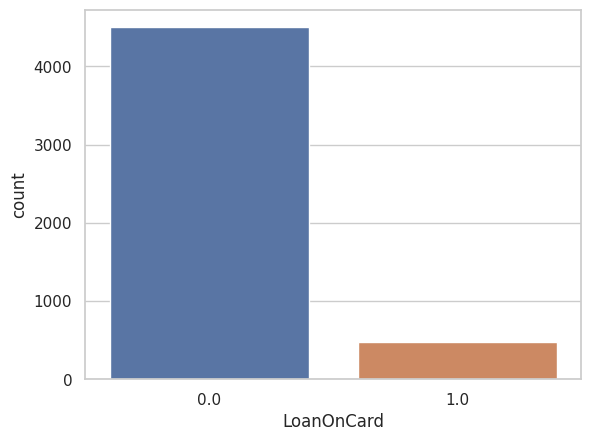

In [41]:
sns.countplot(x ='LoanOnCard', data = merged_df)
plt.show()

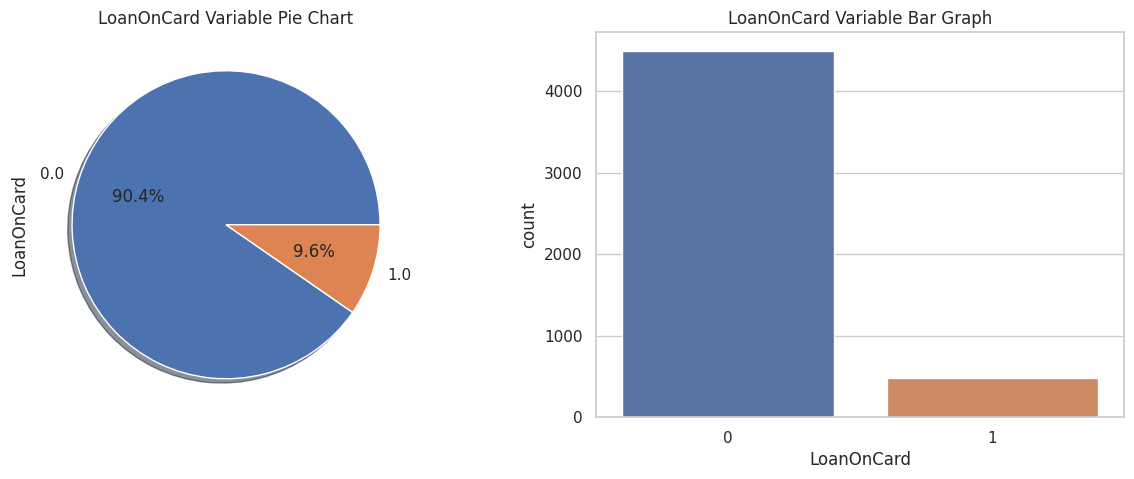

In [42]:
f,axes=plt.subplots(1,2,figsize=(15,5))
merged_df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(x='LoanOnCard',data=merged_df,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

Observation 1:90.4% of people dont have loan on credit card

In [43]:
merged_df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [44]:
merged_df['LoanOnCard'] = merged_df['LoanOnCard'].fillna(merged_df['LoanOnCard'].mode()[0])

In [45]:
merged_df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [46]:
col=['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore','LoanOnCard']
for i in col:
    print(merged_df[i].value_counts())

0    3530
1    1470
Name: CreditCard, dtype: int64
1    2984
0    2016
Name: InternetBanking, dtype: int64
0    4698
1     302
Name: FixedDepositAccount, dtype: int64
0    4478
1     522
Name: Security, dtype: int64
1    2096
3    1501
2    1403
Name: Level, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name: HiddenScore, dtype: int64
0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64


No unexpected entries found...so moving on to next steps

In [47]:

X=merged_df.drop(columns='LoanOnCard')
y=merged_df['LoanOnCard']

In [48]:
print(merged_df.columns)

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [50]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)
print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9101333333333333
Accuracy on Test data: 0.9024


Accuracy of training data is : 91 %
Accuracy of test data is : 90%

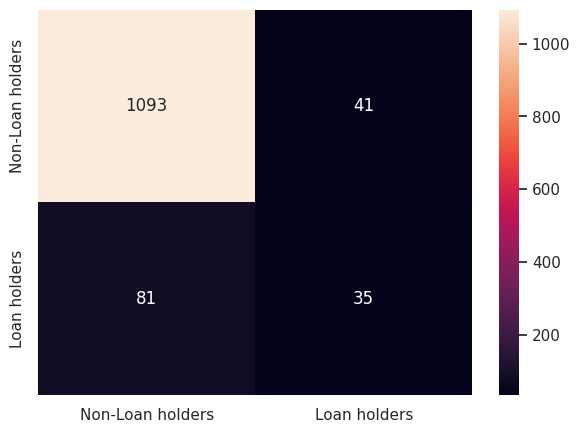

In [51]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [52]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1134
         1.0       0.46      0.30      0.36       116

    accuracy                           0.90      1250
   macro avg       0.70      0.63      0.66      1250
weighted avg       0.89      0.90      0.89      1250



The confusion matrix shows that the model is performing well overall, with an accuracy of 92%. However, there are some areas where the model can be improved. For example, the model is misclassifying a significant number of positive cases as negative cases. This is evident in the high false negative rate of 20%.

To improve the model's performance, we can try the following:

Collect more data, especially data on positive cases. This will help the model to learn the patterns associated with positive cases better.

Use a different classification algorithm. Some classification algorithms are better suited for certain types of problems than others. For example, support vector machines (SVMs) are often good at classifying data with high false negative rates.

In [53]:
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(X,y)
print('Before sampling:')
print(y.value_counts())

Before sampling:
0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64


In [54]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
0.0    4520
1.0    4520
Name: LoanOnCard, dtype: int64


## Re-train the model to check improvement

In [56]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(x_s, y_s, test_size=0.25, random_state=10)
logit = LogisticRegression()
logit.fit(Xs_train, ys_train)
logit_pred = logit.predict(Xs_test)
print('Accuracy on Training data:',logit.score(Xs_train, ys_train) )
print('Accuracy on Test data:',logit.score(Xs_test, ys_test) )

Accuracy on Training data: 0.8638643067846608
Accuracy on Test data: 0.8477876106194691


Drop in accuracy is abserved due to sampling checking confusion matrix for better picture

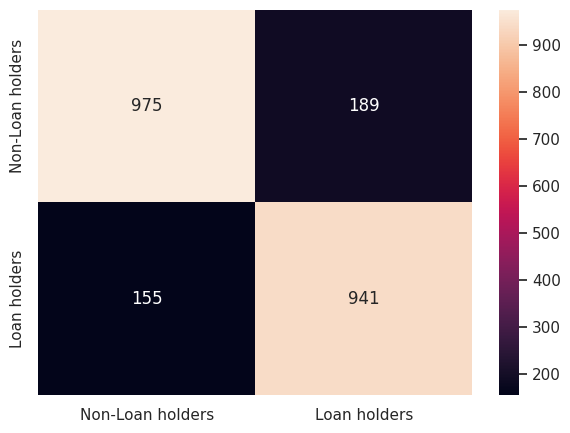

In [57]:
cm = confusion_matrix(ys_test, logit_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [58]:
print("classification  Matrix:\n",classification_report(ys_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1164
         1.0       0.83      0.86      0.85      1096

    accuracy                           0.85      2260
   macro avg       0.85      0.85      0.85      2260
weighted avg       0.85      0.85      0.85      2260



The two confusion matrices you have provided show that the first model is outperforming the second model on all metrics, except for recall of the positive class.
The first model has a higher accuracy, precision, and F1-score than the second model. This means that the first model is better at correctly identifying both positive and negative cases, and it is generating fewer false positives.

However, the second model has a higher recall of the positive class than the second model. This means that the second model is less likely to miss true positives.

Overall, the first model is outperforming the second model on most metrics. However, the choice of which model to use will depend on the specific requirements of the task. If it is important to minimize false positives, then the first model is the better choice. However, if it is important to minimize false negatives, then the second model may be a better choice

In [59]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
predicted_labels = KNN_model.predict(X_test)
print('Accuracy on Training data:',KNN_model.score(X_train, y_train) )
print('Accuracy on Test data:',KNN_model.score(X_test, y_test) )

Accuracy on Training data: 0.9101333333333333
Accuracy on Test data: 0.9064


In [60]:
svc=SVC()
svc.fit(X_train, y_train)
predicted_labels = svc.predict(X_test)
print('Accuracy on Training data:',svc.score(X_train, y_train) )
print('Accuracy on Test data:',svc.score(X_test, y_test) )

Accuracy on Training data: 0.9029333333333334
Accuracy on Test data: 0.9072


In [61]:
models = []
models.append(('LR', logit))
models.append(('KNN', KNN_model))
models.append(('SVM', svc))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.914200 (0.015709)
KNN: 0.872600 (0.035384)
SVM: 0.904000 (0.000000)



Logistic regression was chosen as the final model because it performed well in both training and testing, as well as in k-fold cross-validation. The deviation was also very low.

In [62]:

# Create a grid of hyperparameters
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1"]}

# Create a LogisticRegression classifier with the Liblinear solver
logreg = LogisticRegression(solver='liblinear')

# Create a GridSearchCV object
logreg_cv = GridSearchCV(logreg, grid, cv=10)

# Fit the model
logreg_cv.fit(X_train, y_train)

# Print the tuned hyperparameters and accuracy
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


tuned hyperparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1'}
accuracy : 0.9474666666666666


In [63]:
logit = LogisticRegression(C=1.0,penalty='l2')
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)
print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9101333333333333
Accuracy on Test data: 0.9024


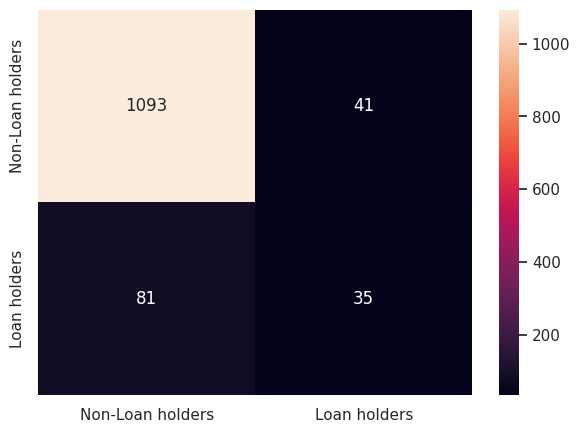

In [64]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [65]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1134
         1.0       0.46      0.30      0.36       116

    accuracy                           0.90      1250
   macro avg       0.70      0.63      0.66      1250
weighted avg       0.89      0.90      0.89      1250



false positive and false negitive values are now minimal.
good accuracy after stratified Kfold.